<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Симуляции-случайных-величин" data-toc-modified-id="Симуляции-случайных-величин-1">Симуляции случайных величин</a></span><ul class="toc-item"><li><span><a href="#Генерация-случайных-величин-в-python" data-toc-modified-id="Генерация-случайных-величин-в-python-1.1">Генерация случайных величин в python</a></span></li><li><span><a href="#Плотность-и-функция-распределения" data-toc-modified-id="Плотность-и-функция-распределения-1.2">Плотность и функция распределения</a></span></li><li><span><a href="#Эмпирическое-распределение" data-toc-modified-id="Эмпирическое-распределение-1.3">Эмпирическое распределение</a></span></li><li><span><a href="#Генерация-выборок" data-toc-modified-id="Генерация-выборок-1.4">Генерация выборок</a></span></li><li><span><a href="#Зёрна" data-toc-modified-id="Зёрна-1.5">Зёрна</a></span></li></ul></li></ul></div>


#  Симуляции случайных величин

В этой тетрадке мы поговорим как в python можно симулировать разные случайные величины и смотреть как они выглядят.

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

## Генерация случайных величин в python


Иногда для решения задач по теории вероятностей или исследования свойств статистических алгоритмов нужно сгенерировать случайную выборку из какого-нибудь распределения. Чтобы сгенерировать в `python` любую случайную величину, нужно сделать две вещи: 

* Выбрать генератор. 

Внутри пакета `scipy.stats` есть [много разных распределений.](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) Среди всего этого обилия нужно найти нужное распределение и задать его параметры. Давайте сделаем это  на примере **нормального распределения**, $X \sim N(\mu, \sigma^2)$. Того самого распределения, плотность которого выглядит как: 

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$


Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$.

In [2]:
help(stats.norm)

Help on norm_gen in module scipy.stats._continuous_distns:

<scipy.stats._continuous_distns.norm_gen object>
    A normal continuous random variable.
    
    The location (``loc``) keyword specifies the mean.
    The scale (``scale``) keyword specifies the standard deviation.
    
    As an instance of the `rv_continuous` class, `norm` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(loc=0, scale=1, size=1, random_state=None)
        Random variates.
    pdf(x, loc=0, scale=1)
        Probability density function.
    logpdf(x, loc=0, scale=1)
        Log of the probability density function.
    cdf(x, loc=0, scale=1)
        Cumulative distribution function.
    logcdf(x, loc=0, scale=1)
        Log of the cumulative distribution function.
    sf(x, loc=0, scale=1)
        Survival function  (also defined as ``1 - cdf``, but `sf

In [3]:
norm_rv = stats.norm(loc = 0, scale = 1)  # задали генератор 
#norm_rv

In [4]:
norm_rv

Когда конкретный генератор готов, у него можно вызывать разные методы: 

* `rvs` сгенерирует нам выборку из распределения объёма `size`
* `cdf` вычислит для нас значение функции распределения (cumulative distribution function) в указанной точке
* `pdf` вычислит значение плотности распределения (probability density function) в указанной точке 
* `ppf` вычислит квантиль, указанного уровня

[В документации](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) можно найти и другие методы, но мы с ними практически не будем встречаться в течение нашего курса (см. разел statistical functions).

In [5]:
sample = norm_rv.rvs(1000)  # сгенерируем 1000 значений
sample[1:31]

array([-0.2427241 , -1.16189743, -1.06474261,  1.16972873,  1.49171803,
       -2.60284042, -0.98762452, -0.43850657,  0.15023208, -0.65611383,
        0.73889249, -2.13952726,  1.59429847, -0.3476907 , -0.06671456,
       -1.64194795, -0.22861115,  0.3759544 , -1.96087799, -1.3682516 ,
       -0.82596202,  1.06116521,  1.39553298, -1.51950811, -0.27776922,
       -1.57856666, -0.41155481, -1.29593875, -0.03132964, -0.40793395])

In [6]:
sample.shape

(1000,)

In [7]:
print("E(x):", round(sample.mean(), 4), '\n', 
      "Var(x)^(1/2):", round(sample.std(), 4))

E(x): -0.0179 
 Var(x)^(1/2): 0.9873


## Плотность и функция распределения


Теперь мы можем немного поэкспериментировать с нашей случайной величиной. Например, __мы можем узнать $f(1)$__.

In [8]:
norm_rv.pdf(1)

0.24197072451914337

Можем построить картинку для плотности распределения, $f(x)$. 

In [9]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

In [10]:
norm_rv.pdf(2)

0.05399096651318806

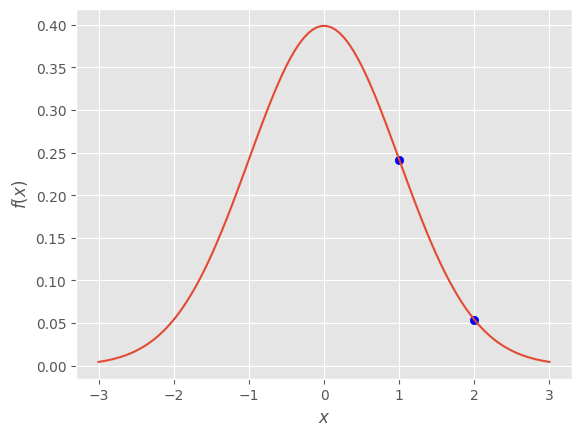

In [11]:
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1,2], 
            [norm_rv.pdf(1), norm_rv.pdf(2)], color="blue");

Теперь узнаем значение функции распределения в точке $1$: $$F(1) = P(X \le 1) = \int_{-\infty}^1 f(x)dx$$

In [12]:
norm_rv.cdf(1)

0.8413447460685429

На плотности распределения это выглядит как площадь до точки $1$, то есть вероятность того, что $X \le 1$.

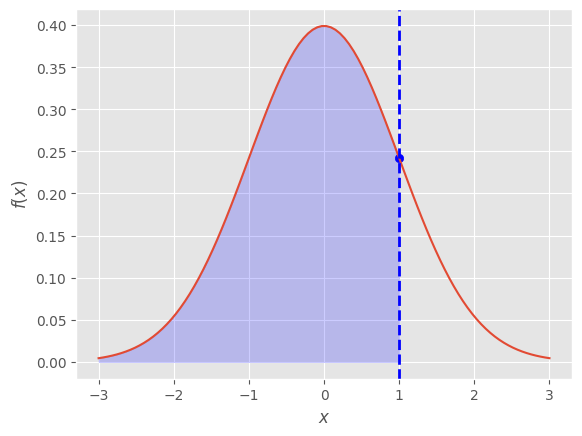

In [13]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1], [norm_rv.pdf(1)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(-3, 1, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2);

In [14]:
# правило 3 сигм
print('Диапазон:', sample.mean() - sample.std() * 3, '\n',
        sample.mean() + sample.std() * 3)

Диапазон: -2.9796423160995524 
 2.9439131725252685


In [15]:
for x in [1,2,3]:
    print(f'P({-x} < X < {x}) = Ф({x})-Ф({-x}) = ', norm_rv.cdf(x)-norm_rv.cdf(-x))

P(-1 < X < 1) = Ф(1)-Ф(-1) =  0.6826894921370859
P(-2 < X < 2) = Ф(2)-Ф(-2) =  0.9544997361036416
P(-3 < X < 3) = Ф(3)-Ф(-3) =  0.9973002039367398


Можем построить картинку для функции распределения.

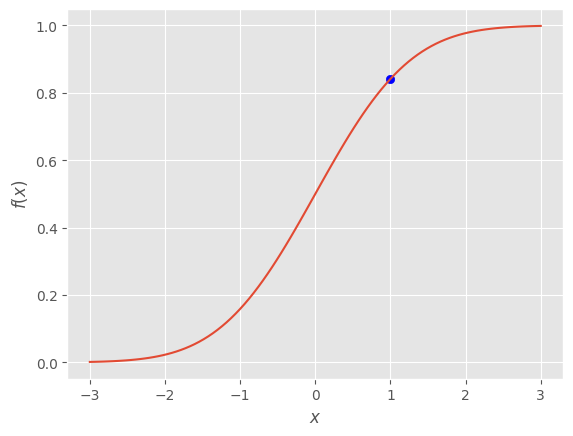

In [16]:
x = np.linspace(-3, 3, 100)
cdf = norm_rv.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(1)
plt.scatter([1], [norm_rv.cdf(1)], color="blue");

А теперь найдём ещё одну вероятность:

$$ P(1 < X < 3) = \int_1^3 f(x) dx = F(3) - F(1)$$

Это уже вероятность попасть в конкретный отрезок, изобразим её на плотности распределения. 

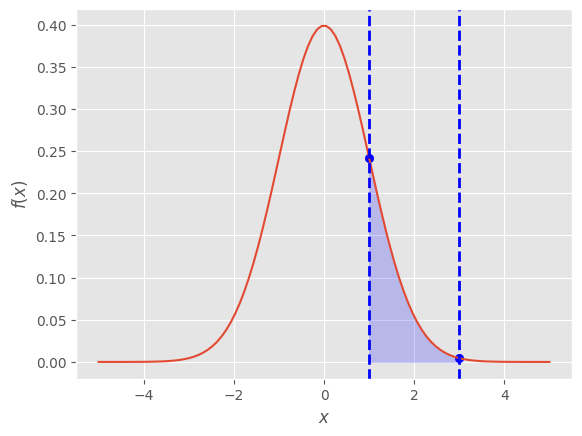

In [17]:
x = np.linspace(-5, 5, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1, 3], [norm_rv.pdf(1), norm_rv.pdf(3)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(1, 3)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(3, color='blue', linestyle="--", lw=2);

In [18]:
norm_rv.cdf(3) - norm_rv.cdf(1)

0.15730535589982697

Для полноты картины осталось только найти какой-нибудь квантиль. Квантиль уровня $\gamma$ это такое число $q$, что 

$$P(X \le q) = \gamma$$

Найдём $99\%$ перцентиль и нарисуем его на картинке с плотностью:

In [19]:
q = norm_rv.ppf(0.99)
#q = norm_rv.ppf(0.5)  # медиана
q

2.3263478740408408

In [20]:
norm_rv.ppf(0.5)

0.0

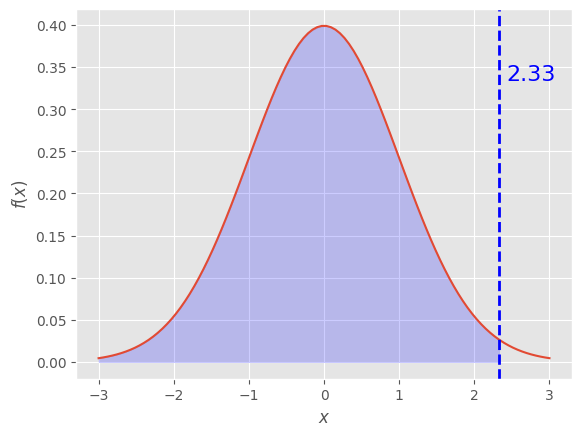

In [21]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(-3, q)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16);

Обратите внимание, что всё, что мы сейчас делали - мы делали с теоретическим распределением. По аналогии можно работать с любым другим распределением. Например, с экспоненциальным: 

In [22]:
exp_rv = stats.expon(scale = 5)
exp_rv.rvs(5)

array([ 5.97002723, 11.19519791,  0.86057401,  6.23727673,  4.86209389])

## Эмпирическое распределение 

Давайте теперь поработаем с выборкой. Обычно мы не знаем из какого распределения она пришла к нам в руки. Мы можем посчитать какие-нибудь характеристики для нашей случайной величины.

In [23]:
sample = sample[:500]

In [24]:
sample.shape

(500,)

In [25]:
np.mean(sample)  # выборочное среднее(при больших n похоже на математическое ожидание)

-0.053426279230199686

In [26]:
np.var(sample)   # выборочная дисперсия

1.0319397932183336

In [27]:
np.std(sample)   # выборочное стандартное отклонение

1.0158443745074015

In [28]:
np.median(sample) # выборочная медиана

-0.061261155742556916

Построим гистограмму. Гистограмма - это эмпирическая оценка для плотности распределения. 

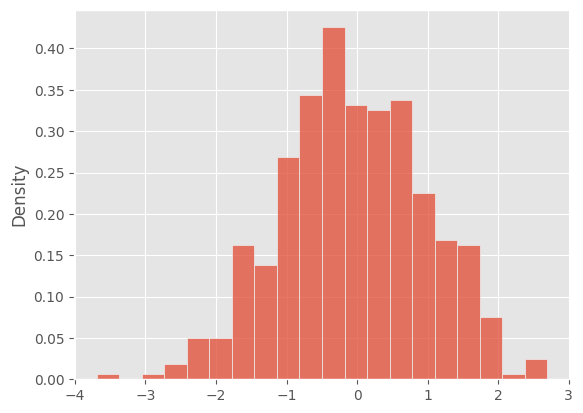

In [29]:
sns.histplot(sample, bins=20, stat='density');  # bins отвечает за число столбцов

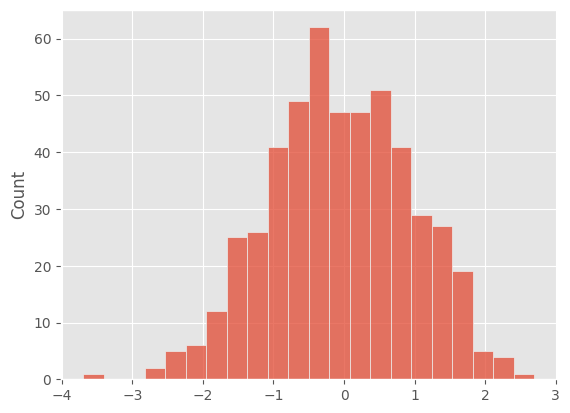

In [36]:
sns.histplot(sample, bins = 22);  # bins отвечает за число столбцов

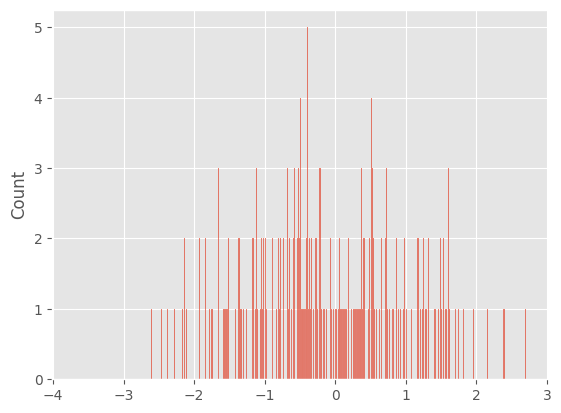

In [30]:
sns.histplot(sample, bins = 1000);  # bins отвечает за число столбцов

Нарисуем гистограмму и плотность на одной картинке. 

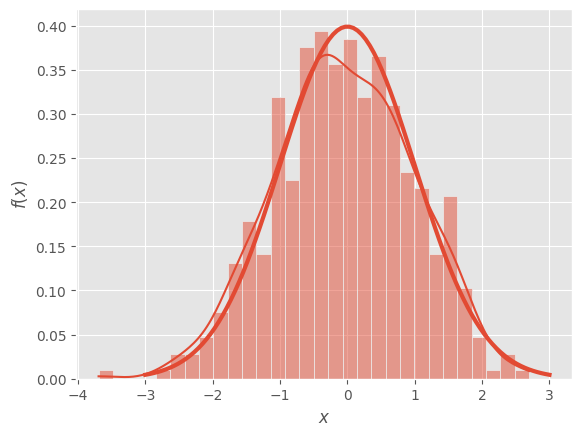

In [31]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
sns.histplot(sample, bins=30, stat='density', kde=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Построим по выборке эмпирическую функцию распределения. 

In [32]:
sample.shape

(500,)

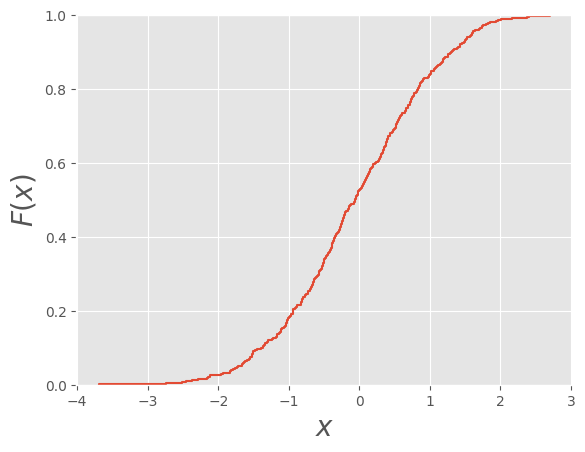

In [33]:
sns.ecdfplot(sample); # строим эмпирическую функцию по выборке
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

Можно нарисовать её на одной картинке с теоретической:

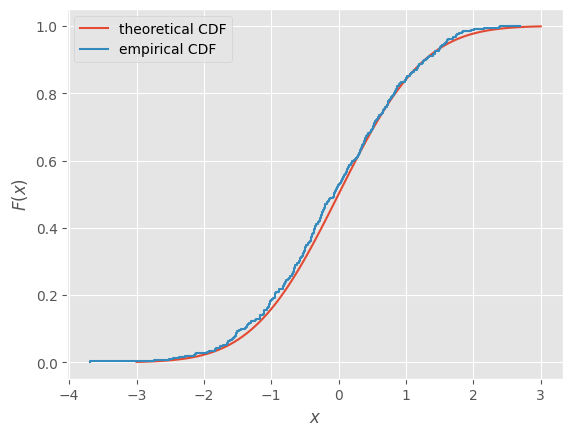

In [37]:
from statsmodels.distributions.empirical_distribution import ECDF

x = np.linspace(-3, 3, 100)

# теоретическа cdf 
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

## Генерация выборок

С помощью таких же нехитрых манипуляций можно симулировать различные события. Например, можно сгенерировать выборку без повторений из вектора `1:10` размера `5`. Все элементы будут выбираться равновероятно.

Мы это будем делать [с помощью `np.random`.](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) Внутри numpy реализованы самые простые генераторы, и их, обычно, использовать довольно удобно. 

In [38]:
dice = np.arange(1,7)
dice

array([1, 2, 3, 4, 5, 6])

In [39]:
np.random.choice(dice, 
                 size=5,
                 replace=False) # выборка без повторений

array([2, 6, 1, 5, 3])

Можно делать генерации с повторениями, параметр `replace` базово равен `True`.

In [40]:
np.random.choice(dice, 
                 size=5,
                replace=True) # с повторениями

array([1, 5, 3, 3, 2])

А ещё можно самостоятельно расставить вероятности событий. Давайте, например устроим симуляцию рыбалки! 

In [41]:
np.random.choice(['карась', 'плотва', 'щука', 'ничего не поймали'], 
                 size = 10, 
                 p = [0.2, 0.2, 0.5, 0.1]) # с повторениями

array(['щука', 'карась', 'карась', 'щука', 'ничего не поймали', 'плотва',
       'ничего не поймали', 'щука', 'щука', 'плотва'], dtype='<U17')

## Seed (зёрна) 

Если выполнить команду `stats.norm(loc=3, scale=2).rvs(5)` на двух разных компьютерах или два раза на одном и том же, то результат будет разный. Не зря же они случайные :)

In [42]:
rv = stats.norm(loc=3, scale=2)
rv.rvs(5)

array([1.22041562, 3.96551157, 4.57701398, 3.16817291, 4.67836448])

In [43]:
stats.norm(loc=3, scale=2).rvs(5)

array([-0.96143391,  4.64323356,  0.17081135,  4.30691771,  4.3595659 ])

Однако генерирование случайных величин никак не противоречит идее абсолютно точной воспроизводимости исследований. Для того, чтобы получились одинаковые результаты, необходимо синхронизировать генераторы случайных чисел на этих двух компьютерах. Делается это путём задания зерна генератора случайных чисел (seed). Зерно также называют стартовым значением. В качестве зерна подойдёт любое целое число.

In [44]:
stats.norm(loc=3, scale=2).rvs(5)

array([4.82452462, 6.1630118 , 2.25538506, 0.66777145, 0.24745516])

In [54]:
stats.norm(loc=3, scale=2).rvs(5)

array([ 3.07991357,  4.78184413, -0.01852872,  4.61443348,  4.02738378])

In [55]:
stats.norm(loc=3, scale=2).rvs(50000).mean()

3.0075852010788453

In [67]:
stats.norm(loc = 3, scale = 2).rvs(5, random_state = 111)

array([0.73232333, 3.76863839, 5.99310755, 2.28923541, 1.42493292])

In [80]:
stats.norm(loc = 3, scale = 2).rvs(55, random_state = 111)

array([ 0.73232333,  3.76863839,  5.99310755,  2.28923541,  1.42493292,
        2.08112218,  2.88166246,  2.291653  ,  1.52895389,  0.63212023,
        3.47778827,  1.82015948,  0.11882976,  4.54740622,  0.94406534,
        2.8180275 ,  3.98400601,  3.8493444 ,  5.56609763,  3.63197291,
        2.1838356 ,  2.86410481,  1.09514668,  2.7786452 ,  4.14118859,
        4.83084034, -0.33868101,  3.96542729,  2.37905466,  7.78937946,
        6.10186184,  1.70706965,  1.14212553, -0.30995229,  3.70038501,
        2.71648697,  4.04216357,  2.95819827, -0.4876879 ,  1.40168225,
        0.39285914,  3.35621   ,  2.33119527,  2.38794574,  2.33518885,
        6.92589468,  4.43848498,  5.28577302,  7.16575394,  0.43070449,
        4.07625522,  2.91092118,  8.19432874,  2.88346744,  1.10942601])


Многие алгоритмы в анализе данных в какой-то степени основаны на случайности (например в самом начале обучения веса берутся из какого-то распределения или обучение идёт на случайной подвыборке). Чтобы добиться воспроизводимых, одинаковых результатов, не зависящих от запуска, нужно устанавливать зерно генерации. 